In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
ch = pd.read_csv('./source/experiment.csv')

# 'conda install xlrd'　が必要
excel = pd.read_excel('./source/分光器較正係数.xlsx', sheet_name=0)

# まとめファイルの読み込み
matome = pd.read_csv('./source/data/まとめ.csv')
print(matome)


           データ名 ガス種  内圧[*10^-3Torr]  カソード電流[A]  プラズマ電流[A]  露光時間[ms]
0    20191024_1  Ar               2       20.0        1.0      1000
1    20191024_2  Ar               1       24.5        1.0      1000
2    20191024_3  Ar               1       26.0        2.1      1000
3    20191024_4  Ar               1       26.0        0.0      1000
4    20191024_5  Ar               1       25.5        1.5      1000
5    20191024_6  Ar               1       25.5        0.0      1000
6    20191024_7   D               1       25.0        1.0      1000
7    20191024_8   D               1       25.0        1.0       500
8    20191024_9   D               1       25.0        0.0      1000
9   20191024_10   D               1       25.0        0.0       500
10  20191024_11   D               1       25.0        2.0       500
11  20191024_12   D               1       25.0        2.0      3000
12  20191024_13   D               2       25.0        2.0      3000
13  20191024_14   D               3       25.0  

In [3]:
excel.shape

(1723, 3)

In [4]:
excel.keys()

Index(['Unnamed: 0', 'wavelength', 'calibration coefficiet'], dtype='object')

In [5]:
# エクセルシートにあったwavelengthの範囲を求める
min_wavelength = float(excel['wavelength'][0])
max_wavelength = float(excel['wavelength'][excel.shape[0]-1])

In [6]:
ch.keys()

Index(['データ名', '実験名', '元データ名'], dtype='object')

実験3


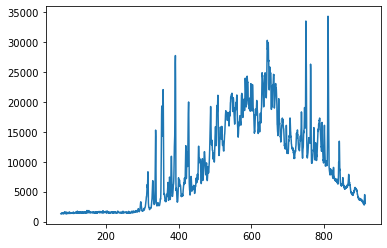

実験4


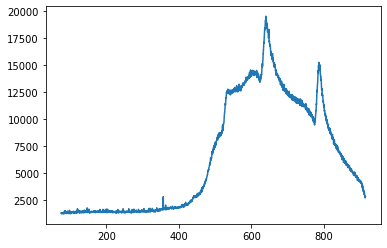

実験5


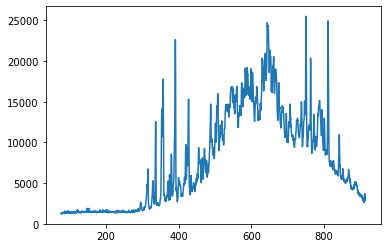

実験6


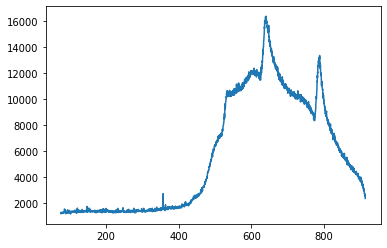

実験7


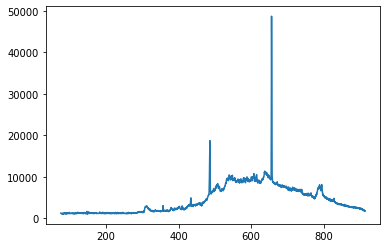

実験9


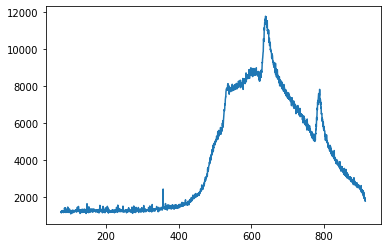

実験8


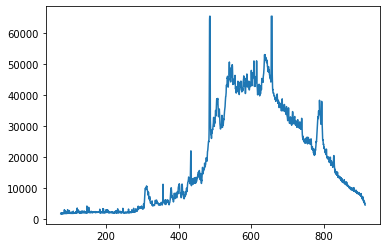

実験10


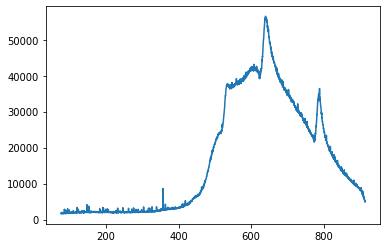

実験14


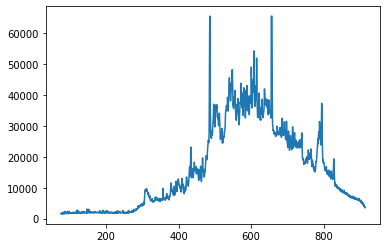

実験15


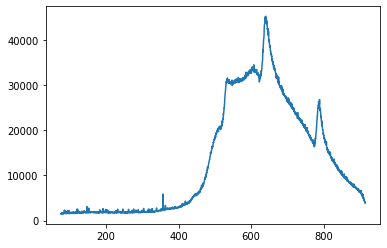

In [7]:
for i in range(1, 6):
    exp = ch.query('データ名 == "exp{}"'.format(i))
    exp_back = ch.query('データ名 == "exp{}_back"'.format(i))
    
    f = pd.read_csv('./source/usable_data/exp{}.csv'.format(i), dtype=float)
    b = pd.read_csv('./source/usable_data/exp{}_back.csv'.format(i), dtype=float)
    
    # 実験ごとのグラフ 波長-スペクトル
    print(exp['実験名'].values[0])
    plt.plot(f['Wavelength'], f['Raw data #1'])
    plt.show()
    
    print(exp_back['実験名'].values[0])
    plt.plot(b['Wavelength'], b['Raw data #1'])
    plt.show()
    
    # エクセルの波長範囲のdataを抽出
    f_spec = f[['Wavelength', 'Raw data #1']]
    b_spec = b[['Wavelength', 'Raw data #1']]

    
    f_spec = f_spec.rename(columns={'Raw data #1': 'F_data'})
    b_spec = b_spec.rename(columns={'Raw data #1': 'B_data'})
    
    # 露光時間 s
    ro_time = matome.query('データ名 == "{}"'.format(exp['元データ名'].values[0]))['露光時間[ms]'].values[0]/1000

    
    # 感度較正
    # {(分光器の計測値 ーバックグラウンド)/(露光時間[sec])}*calibration_coefficient
    # 分光器の計測値 [CCDのカウント数] を光強度 [W m^-2 nm^-1 sr^-1] に較正する．
    
    re = pd.merge(f_spec, b_spec, on='Wavelength')
    re = re[(re['Wavelength']>=min_wavelength) & (re['Wavelength'] <= max_wavelength) & (re['Wavelength'] != np.nan)]
    
    re['Intensity'] = ((re['F_data']-re['B_data'])/ro_time) * excel['calibration coefficiet'].values
    re.to_csv('./source/result/exp{}.csv'.format(i), index=False)

exp1


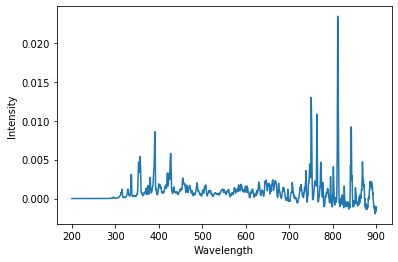

exp2


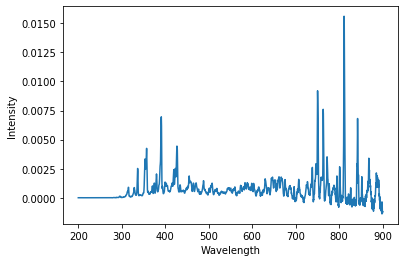

exp3


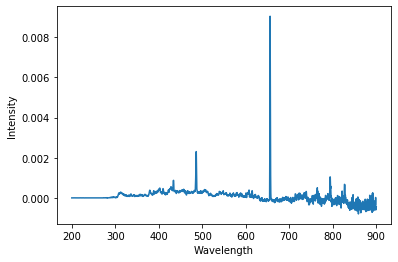

exp4


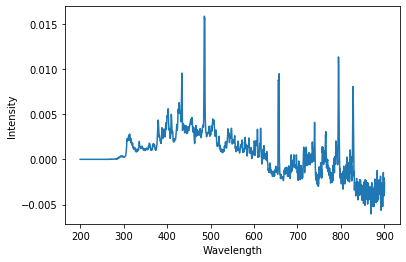

exp5


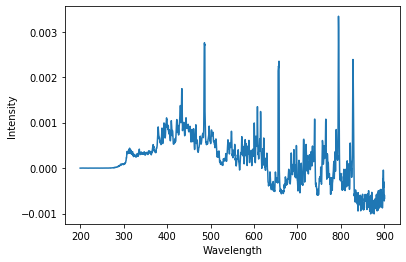

In [18]:
# 感度較正
# 縦軸: 光強度
# 横軸: 波長
for i in range(1, 6):
    f = pd.read_csv('./source/result/exp{}.csv'.format(i), dtype=float)
    print('exp{}'.format(i))
    plt.plot(f['Wavelength'], f['Intensity'])
    plt.xlabel("Wavelength")
    plt.ylabel("Intensity")
    plt.show()

In [22]:
%run tools.py

<Figure size 432x288 with 0 Axes>

In [25]:
font_setup(size=16)

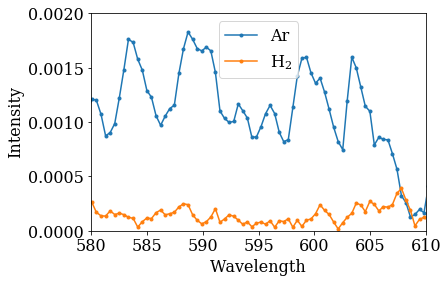

In [29]:
f = pd.read_csv('./source/result/exp{}.csv'.format(1), dtype=float)
plt.plot(f['Wavelength'], f['Intensity'],".-",label="Ar")
f = pd.read_csv('./source/result/exp{}.csv'.format(3), dtype=float)
plt.plot(f['Wavelength'], f['Intensity'],".-",label="$H_2$")


plt.xlabel("Wavelength")
plt.ylabel("Intensity")
xlim(580,610)
ylim(0.0,0.002)
legend()
savefig("Fulcher.png",dpi=200)

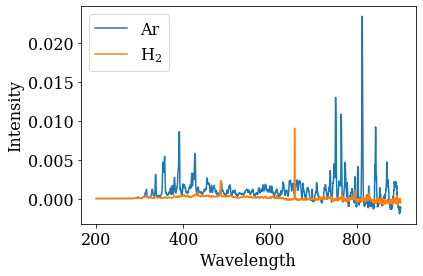

In [30]:
f = pd.read_csv('./source/result/exp{}.csv'.format(1), dtype=float)
plt.plot(f['Wavelength'], f['Intensity'],"-",label="Ar")
f = pd.read_csv('./source/result/exp{}.csv'.format(3), dtype=float)
plt.plot(f['Wavelength'], f['Intensity'],"-",label="$H_2$")


plt.xlabel("Wavelength")
plt.ylabel("Intensity")
#xlim(580,610)
#ylim(0.0,0.002)
legend()
savefig("fig2.png",dpi=200)

In [20]:
# result下のexp1.csv, exp2.csv　などがもとまったデータです
# Wavelength: 波長
# F_data: 分光器の計測値
# B_data: バックグラウンドの計測値
# Intensity: 感度較正でもとまった光強度 単位は[W m^(-2) nm^(-1) sr^(-1)]